Model loaded successfully from C:\xampp\htdocs\SLIIT\ENT-disease-detection-dl-models\cholesteatoma_detection_and_classification\endoscopy_image_validator\ResNet50_endoscopy_image_validator.h5
1/1 [==============================] - 1s 965ms/step
Raw Prediction: [[0.02012656]]


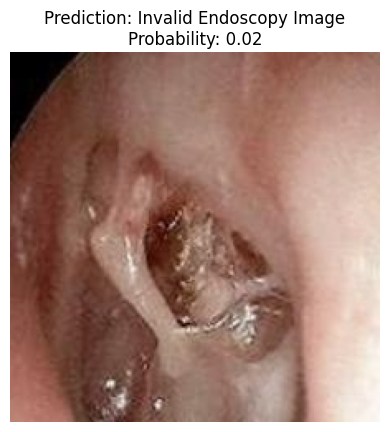

Test Result: Invalid Endoscopy Image


In [11]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

# Check if running in Google Colab
try:
    from google.colab import drive
    DRIVE_MOUNTED = False
except ImportError:
    DRIVE_MOUNTED = False

# Constants
IMG_HEIGHT, IMG_WIDTH = 224, 224

TEST_IMAGE = "/stage3-2.JPEG" # Change these image names to test images in the test folder.
TEST_IMAGE_DRIVE = "/test_image.jpg" # Change these image names to test images in the test folder in drive.

# Mount Google Drive if in Google Colab
if DRIVE_MOUNTED:
    drive.mount('/content/drive')
    MODEL_PATH = "/content/drive/MyDrive/ColabNotebooks/endoscopy-image-validator/endoscopy_image_validator_model.h5"
    TEST_IMAGE_PATH = "/content/drive/MyDrive/ColabNotebooks/endoscopy-image-validator/test" + TEST_IMAGE_DRIVE
else:
    MODEL_PATH = r"C:\xampp\htdocs\SLIIT\ENT-disease-detection-dl-models\cholesteatoma_detection_and_classification\endoscopy_image_validator\ResNet50_endoscopy_image_validator.h5"
    TEST_IMAGE_PATH = r"C:\xampp\htdocs\SLIIT\ENT-disease-detection-dl-models\cholesteatoma_detection_and_classification\endoscopy_image_validator\dataset\test" + TEST_IMAGE

# Load the trained model
try:
    model = load_model(MODEL_PATH, compile=False)
    print(f"Model loaded successfully from {MODEL_PATH}")
except Exception as e:
    raise ValueError(f"Error loading model: {e}")

# Function to preprocess an image
def preprocess_image(image_path):
    img = cv2.imread(image_path)  # Load image
    if img is None:
        raise ValueError(f"Could not read image from {image_path}")
    img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))  # Resize to model input dimensions
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension for model
    return img

# Global probability
probability = None

# Function to classify the image
def classify_image(image_path):
    try:
        img = preprocess_image(image_path)
        prediction = model.predict(img)
        print(f"Raw Prediction: {prediction}")

        # Get the prediction score
        global probability
        probability = prediction[0][0]

        if probability > 0.5:
            return "Valid Endoscopy Image"
        else:
            return "Invalid Endoscopy Image"
    except Exception as e:
        return f"Error during classification: {e}"

# Test the model
try:
    # Perform classification
    result = classify_image(TEST_IMAGE_PATH)

    # Open and display the test image
    test_image = Image.open(TEST_IMAGE_PATH).convert("RGB")
    plt.imshow(test_image)
    plt.axis('off')  # Hide axes
    plt.title(f"Prediction: {result}\nProbability: {probability:.2f}")
    plt.show()

    print(f"Test Result: {result}")
except Exception as e:
    print(f"Error: {e}")
